# E-tivity 3: Clustering and Manifold Learning

Use this notebook to complete Tasks 1 and 2 in E-tivity3.

### Import Python Modules

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import manifold
from sklearn import cluster
from sklearn import preprocessing

In [4]:
df = pd.read_csv("loans_dataset_et3.csv")
"|".join(df.columns.values)

'ApplicantIncome|CoapplicantIncome|LoanAmount|Loan_Amount_Term|Credit_History'

In [5]:
df.head(5)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,2483,2466.0,90,180,0
1,4917,0.0,130,360,0
2,4106,0.0,40,180,1
3,3859,3300.0,142,180,1
4,6417,0.0,157,180,1


In [6]:
data = np.array(df.values, dtype=float)

In [7]:
min_max_scaler = preprocessing.MinMaxScaler()
data = min_max_scaler.fit_transform(data)

In [9]:
data

array([[0.04670427, 0.1233    , 0.12521441, 0.28571429, 0.        ],
       [0.10855313, 0.        , 0.19382504, 0.71428571, 0.        ],
       [0.08794532, 0.        , 0.03945111, 0.28571429, 1.        ],
       ...,
       [0.25677187, 0.        , 0.50600343, 0.71428571, 1.        ],
       [0.13492911, 0.28125   , 0.51114923, 0.71428571, 1.        ],
       [0.13945215, 0.1953    , 0.52658662, 0.71428571, 1.        ]])

In [10]:
colors = np.array(['orange', 'blue', 'lime', 'blue', 'khaki', 'pink', 'green', 'purple'])

# points - a 2D array of (x,y) coordinates of data points
# labels - an array of numeric labels in the interval [0..k-1], one for each point
# centers - a 2D array of (x, y) coordinates of cluster centers
# title - title of the plot

def clustering_scatterplot(points, labels, centers, title):
    # plot the examples, i.e. the data points
    
    n_clusters = np.unique(labels).size
    for i in range(n_clusters):
        h = plt.scatter(points[labels==i,0],
                        points[labels==i,1], 
                        c=colors[i%colors.size],
                        label = 'cluster '+str(i))

    # plot the centers of the clusters
    if centers is not None:
        plt.scatter(centers[:,0], centers[:,1], c='r', marker='*', s=500)

    _ = plt.title(title)
    _ = plt.legend()
    _ = plt.xlabel('x')
    _ = plt.ylabel('y')

In [11]:
k = 3

In [12]:
clustered_data_sklearn = cluster.KMeans(n_clusters=k, n_init=10, max_iter=300).fit(data)

In [13]:
# append the cluster centers to the dataset
data_and_centers = np.r_[data,clustered_data_sklearn.cluster_centers_]

In [14]:
# project both th data and the k-Means cluster centers to a 2D space
XYcoordinates = manifold.MDS(n_components=2).fit_transform(data_and_centers)
print("transformation complete")

transformation complete


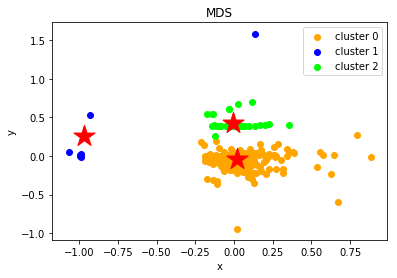

In [15]:
# plot the transformed examples and the centers
# use the cluster assignment to colour the examples
clustering_scatterplot(points=XYcoordinates[:-k,:], 
                       labels=clustered_data_sklearn.labels_, 
                       centers=XYcoordinates[-k:,:], 
                       title='MDS')